In [1]:

import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt

from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
ml = pd.read_csv('ml.csv')
feat = ml.drop(['Unnamed: 0', 'TIME W/ CUTS', 'NODES W/ CUTS', 'TIME W/O CUTS', 'NODES W/O CUTS'], axis=1)
feat

,NAME,RANDOM SEED,INITIAL LP,PRESOLVING TIME,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,...,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr,Time Label,Nodes Label
0,10teams.mps.gz,2,20.0,0.062201,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,...,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
1,10teams.mps.gz,4,20.0,0.060087,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,...,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
2,10teams.mps.gz,8,20.0,0.058780,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,...,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
3,10teams.mps.gz,16,20.0,0.059116,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,...,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
4,10teams.mps.gz,32,20.0,0.058801,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,...,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,-24.0,1.552340,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,...,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025,1,1
2126,wachplan.mps.gz,4,-24.0,1.914422,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,...,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025,1,1
2127,wachplan.mps.gz,8,-24.0,1.507830,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,...,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025,1,1
2128,wachplan.mps.gz,16,-24.0,1.547767,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,...,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025,1,1


In [4]:
X = feat.iloc[0:, 0:-2]
# X = X.astype(np.float64)
y = feat.iloc[0:, -2]
# y = y.astype(np.float64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = X_train.drop(['NAME', 'RANDOM SEED'], axis = 1)
X_test = X_test.drop(['NAME', 'RANDOM SEED'], axis = 1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1704, 22) (1704,)
(426, 22) (426,)


In [9]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
cols = feat.iloc[0:, 2:-2]

bestfeatures = SelectKBest(score_func=f_classif, k = 'all')
fit = bestfeatures.fit(X_train,y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(cols.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(22,'Score')) #print best features
data=featureScores.nlargest(22,'Score')

             Features      Score
16          nonzeroes  22.919990
17            obj_dyn  19.813158
18      dynamism_mean  13.352409
1     PRESOLVING TIME   7.966677
15   linmixbin_constr   6.307941
0          INITIAL LP   6.069777
10     lincard_constr   5.446756
12  linbinpack_constr   3.629570
8   linsetpack_constr   2.326240
5           cont_vars   1.624400
3            bin_vars   1.602365
7   linsetpart_constr   1.598134
19        presol_vars   1.456141
2                vars   1.398210
4            int_vars   0.429321
21      presol_constr   0.134598
6              constr   0.110167
11   lineqknap_constr   0.102906
14  linintknap_constr   0.059046
13    linknaps_constr   0.010188
9    linsetcov_constr   0.000459
20    presol_int_vars   0.000163


<AxesSubplot:ylabel='Features'>

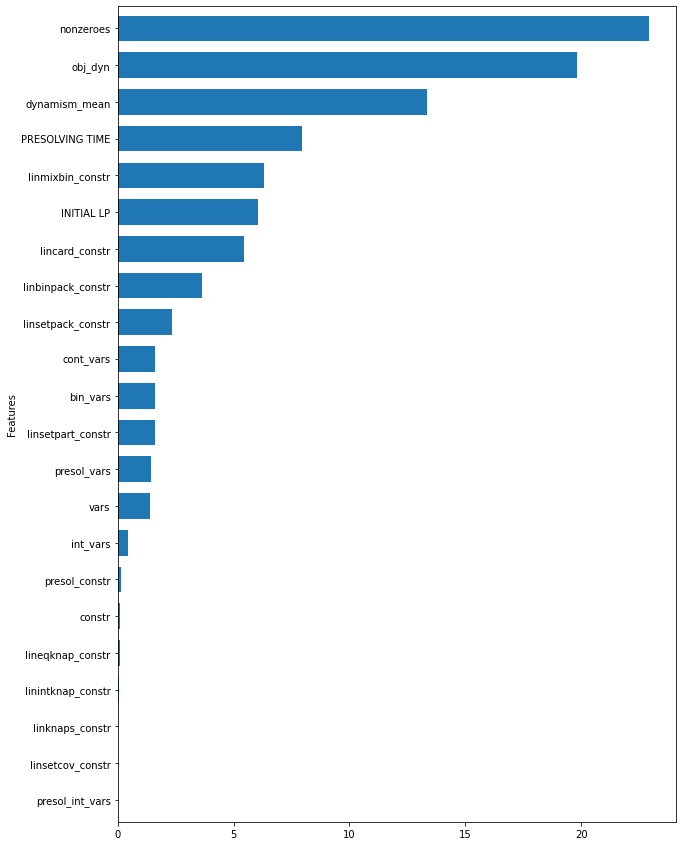

In [11]:
features = data.copy().set_index('Features') 
features = features.iloc[::-1]
features.plot.barh(width = 0.7, figsize=(10,15), legend=None)

In [12]:
X = feat.drop(['Time Label','Nodes Label', 'presol_int_vars', 'linsetcov_constr', 'linknaps_constr',
                 'linintknap_constr', 'lineqknap_constr', 'constr', 'presol_constr', 'int_vars'], axis = 1)

y = y = feat.iloc[0:, -2]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

test_df = X_test.copy()
train_df = X_train.copy()

X_train = X_train.drop(['NAME', 'RANDOM SEED'], axis = 1)
X_test = X_test.drop(['NAME', 'RANDOM SEED'], axis = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1704, 14) (1704,)
(426, 14) (426,)


In [14]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [259]:
model_params={'svm':{'model': SVC(kernel = 'rbf', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]
                             }
                    },
              'rfm':{'model': RandomForestClassifier(random_state = 0), 
                    'params':{'n_estimators':[100, 200, 500], 
                             'max_depth':[5, 10, 15]
                             }
                    },
              'lrm':{'model': LogisticRegression(solver='lbfgs', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 
                              'max_iter':[100, 500, 1000]
                             }
                    },
              'et':{'model': ExtraTreesClassifier(random_state=0), 
                    'params':{'n_estimators': [100, 200, 500], 
                              'max_depth': [5, 10, 15]
                             }
                    },
              'nn':{'model': MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', 
                                           power_t=0.5, max_iter=500, shuffle=True, tol=0.00001, verbose=True, 
                                           early_stopping=False, validation_fraction=0.1, random_state=0),
                    'params':{'hidden_layer_sizes': [(5, ), (10, ), (15, )],
                                 'learning_rate_init': [1e-1, 1e-2, 1e-3],
                                 'alpha':  [1e-2, 1e-3, 1e-4],
                                 'activation': ['tanh', 'relu', 'logistic']
                             }
                    }
             }
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv = None, return_train_score = False, n_jobs = -1)
    clf.fit(X_train, y_train)
    scores.append({'model': model_name, 'best_score':clf.best_score_, 'best_params':clf.best_params_})

C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [260]:
scores=pd.DataFrame(scores).sort_values(by = ['best_score'], ascending = False)
scores.to_csv('scores.csv')

In [15]:
scores = OrderedDict()
target_names = ['-1', '1']

print('SUPPORT VECTOR MACHINES')
clf = SVC(random_state = 0, C = 1000, gamma = 0.01, kernel = 'rbf')
clf.fit(X_train, y_train)
y_train_pred_svm = clf.predict(X_train)
y_test_pred_svm = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_svm)
mse_test = mean_squared_error(y_test, y_test_pred_svm)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_svm, target_names=target_names))
scores['SVC'] = [score, metrics.precision_score(y_test, y_test_pred_svm), metrics.recall_score(y_test, y_test_pred_svm),
                      metrics.f1_score(y_test, y_test_pred_svm), mse_test, mse_train]

print('##################################')
print('NEURAL NETWORKS')
clf = MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', power_t=0.5, max_iter=500, 
                    shuffle=True, tol=0.00001, verbose=True, 
                    early_stopping=False, validation_fraction=0.1,
                    hidden_layer_sizes=(15, ), activation='tanh', alpha=0.001, 
                    learning_rate_init=0.1, random_state=0)
clf.fit(X_train, y_train)
y_train_pred_nn = clf.predict(X_train)
y_test_pred_nn = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_nn)
mse_test = mean_squared_error(y_test, y_test_pred_nn)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_nn, target_names=target_names))
scores['NN'] = [score, metrics.precision_score(y_test, y_test_pred_nn), metrics.recall_score(y_test, y_test_pred_nn),
                      metrics.f1_score(y_test, y_test_pred_nn), mse_test, mse_train]

print('##################################')
print('DECISION TREES')
clf = ExtraTreesClassifier(random_state=0, max_depth = 15, n_estimators = 100)
clf.fit(X_train, y_train)
y_train_pred_et = clf.predict(X_train)
y_test_pred_et = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_et)
mse_test = mean_squared_error(y_test, y_test_pred_et)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_et, target_names=target_names))
scores['ET'] = [score, metrics.precision_score(y_test, y_test_pred_et), 
                         metrics.recall_score(y_test, y_test_pred_et), 
                         metrics.f1_score(y_test, y_test_pred_et), mse_test, mse_train]

print('##################################')
print('LOGISTIC REGRESSION')
clf = LogisticRegression(solver='lbfgs', random_state = 0, C = 1000, max_iter = 100)
clf.fit(X_train, y_train)
y_train_pred_lr = clf.predict(X_train)
y_test_pred_lr = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_lr)
mse_test = mean_squared_error(y_test, y_test_pred_lr)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))
scores['LR'] = [score, metrics.precision_score(y_test, y_test_pred_lr), metrics.recall_score(y_test, y_test_pred_lr),
                      metrics.f1_score(y_test, y_test_pred_lr), mse_test, mse_train]

print('##################################')
print('RANDOM FOREST')
clf = RandomForestClassifier(random_state = 0, max_depth = 15, n_estimators = 200 )
clf.fit(X_train, y_train)
y_train_pred_rf = clf.predict(X_train)
y_test_pred_rf = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))
scores['RF'] = [score, metrics.precision_score(y_test, y_test_pred_rf), metrics.recall_score(y_test, y_test_pred_rf),
                      metrics.f1_score(y_test, y_test_pred_rf), mse_test, mse_train]

SUPPORT VECTOR MACHINES
MSE Test: 1.0046948356807512, MSE Train: 0.755868544600939
Accuracy score: 0.7488262910798122

              precision    recall  f1-score   support

          -1       0.72      0.69      0.70       185
           1       0.77      0.80      0.78       241

    accuracy                           0.75       426
   macro avg       0.74      0.74      0.74       426
weighted avg       0.75      0.75      0.75       426

##################################
NEURAL NETWORKS


C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MSE Test: 0.29107981220657275, MSE Train: 0.20422535211267606
Accuracy score: 0.9272300469483568

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92       185
           1       0.95      0.92      0.93       241

    accuracy                           0.93       426
   macro avg       0.92      0.93      0.93       426
weighted avg       0.93      0.93      0.93       426

##################################
DECISION TREES
MSE Test: 0.2347417840375587, MSE Train: 0.07511737089201878
Accuracy score: 0.9413145539906104

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93       185
           1       0.95      0.95      0.95       241

    accuracy                           0.94       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426

##################################
LOGISTIC REGRESSION
MSE Test: 1.7370892018779343, MSE Train: 1.577

In [16]:
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df.columns=['accuracy', 'precision', 'recall', 'f1-score', 'mse test', 'mse train']
scores_df

,accuracy,precision,recall,f1-score,mse test,mse train
SVC,0.748826,0.768000,0.796680,0.782077,1.004695,0.755869
NN,0.927230,0.948718,0.921162,0.934737,0.291080,0.204225
ET,0.941315,0.946281,0.950207,0.948240,0.234742,0.075117
LR,0.565728,0.595890,0.721992,0.652908,1.737089,1.577465
RF,0.969484,0.967213,0.979253,0.973196,0.122066,0.002347


Text(0.5, 1.0, 'MSE')

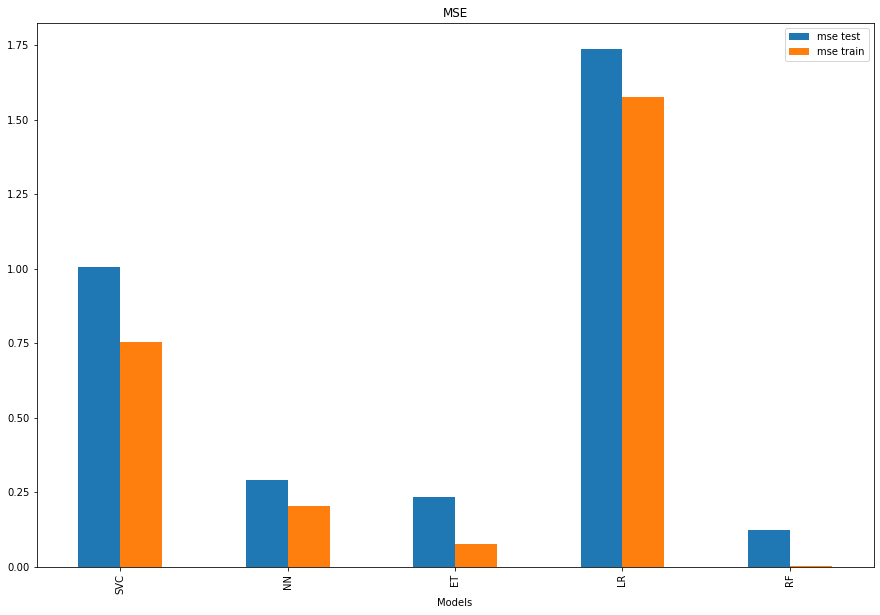

In [17]:
errors_df = scores_df.filter(['mse test', 'mse train'])
errors_df.plot.bar(width = 0.5, figsize=(15,10))
plt.xlabel("Models")
plt.title('MSE')

Text(0.5, 1.0, 'Accuracy Score')

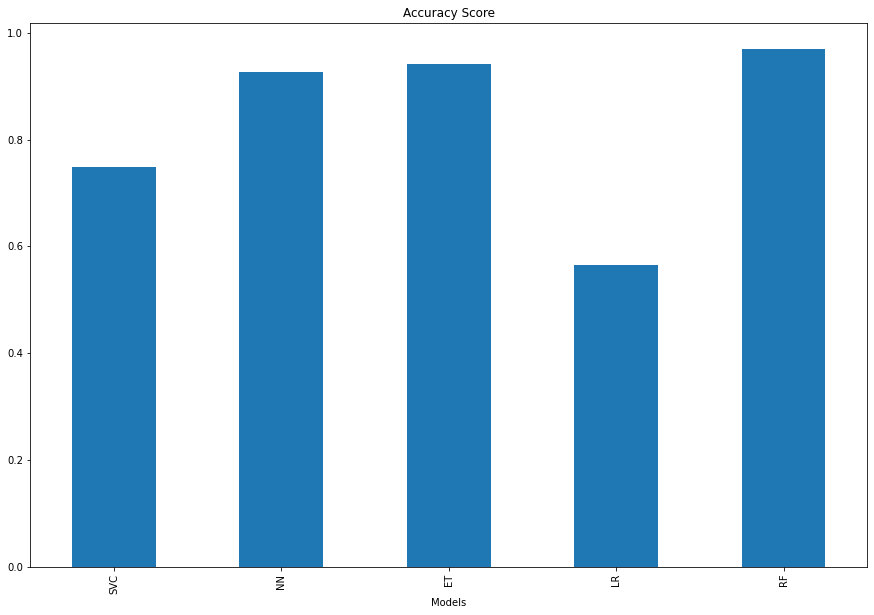

In [18]:
accuracy_df = scores_df.filter(['accuracy'])
accuracy_df.plot.bar(width = 0.5, figsize=(15,10), legend = None)
plt.xlabel("Models")
plt.title('Accuracy Score')

ANALYSIS ON TEST DATA

In [19]:
test_df['PLabel NN'] = y_test_pred_nn
test_df['PLabel ET'] = y_test_pred_et
test_df['PLabel RF'] = y_test_pred_rf
analysis = test_df.loc[test_df.NAME.isin(ml.NAME)]
analysis = analysis.sort_values(by = ['NAME'])
analysis = analysis.merge(ml, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis = analysis.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes
0,10teams.mps.gz,4,11.186637,12.444448,30,276,1,1,1,1,11.186637,30
1,22433.mps.gz,32,2.530001,0.655748,1,5,-1,-1,-1,-1,0.655748,1
2,22433.mps.gz,4,2.531652,0.648197,1,5,-1,-1,-1,-1,0.648197,1
3,30_70_45_05_100.mps.gz,16,282.130789,239.791563,46,201,-1,-1,-1,-1,239.791563,46
4,30_70_45_05_100.mps.gz,2,282.391689,239.315730,46,201,-1,-1,-1,-1,239.315730,46
...,...,...,...,...,...,...,...,...,...,...,...,...
421,umts.mps.gz,4,1078.630442,11225.527010,144227,3106370,1,1,1,1,1078.630442,144227
422,umts.mps.gz,8,1067.636539,11658.804690,144227,3106370,1,1,1,1,1067.636539,144227
423,umts.mps.gz,32,1081.008390,11774.393970,144227,3106370,1,1,1,1,1081.008390,144227
424,var-smallemery-m6j6.mps.gz,16,6758.063573,11952.638130,685889,836578,1,1,1,1,6758.063573,685889


In [20]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == -1.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes,PTime RF,PTime NN,PTime ET,PNodes RF,PNodes NN,PNodes ET
0,10teams.mps.gz,4,11.186637,12.444448,30,276,1,1,1,1,11.186637,30,11.186637,11.186637,11.186637,30,30,30
1,22433.mps.gz,32,2.530001,0.655748,1,5,-1,-1,-1,-1,0.655748,1,0.655748,0.655748,0.655748,5,5,5
2,22433.mps.gz,4,2.531652,0.648197,1,5,-1,-1,-1,-1,0.648197,1,0.648197,0.648197,0.648197,5,5,5
3,30_70_45_05_100.mps.gz,16,282.130789,239.791563,46,201,-1,-1,-1,-1,239.791563,46,239.791563,239.791563,239.791563,201,201,201
4,30_70_45_05_100.mps.gz,2,282.391689,239.315730,46,201,-1,-1,-1,-1,239.315730,46,239.315730,239.315730,239.315730,201,201,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,umts.mps.gz,4,1078.630442,11225.527010,144227,3106370,1,1,1,1,1078.630442,144227,1078.630442,1078.630442,1078.630442,144227,144227,144227
422,umts.mps.gz,8,1067.636539,11658.804690,144227,3106370,1,1,1,1,1067.636539,144227,1067.636539,1067.636539,1067.636539,144227,144227,144227
423,umts.mps.gz,32,1081.008390,11774.393970,144227,3106370,1,1,1,1,1081.008390,144227,1081.008390,1081.008390,1081.008390,144227,144227,144227
424,var-smallemery-m6j6.mps.gz,16,6758.063573,11952.638130,685889,836578,1,1,1,1,6758.063573,685889,6758.063573,6758.063573,6758.063573,685889,685889,685889


In [21]:
testing = analysis.copy()

In [22]:
bb_classes = ['Geometric Mean']
num_bb_classes = len(bb_classes)

bucket_min = [0, 10, 100, 1000, 3600]
bucket_max = [18000, 18000, 18000, 18000, 18000]
num_buckets = len(bucket_min)
assert(len(bucket_max) == num_buckets)
bb_buckets = ['[' + str(bucket_min[j]) + ',' + str(bucket_max[j]) + ')' for j in range(num_buckets)]

bb_metrics = ['Gmean']

In [23]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [24]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [25]:
SHIFT_TIME = 60
SHIFT_NODES = 1000

df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [26]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       409.804899    671.985152   328.898245   
               [10,18000)      734.238950   1234.789798   569.583419   
               [100,18000)    1705.676377   2591.468101  1285.721014   
               [1000,18000)   5421.895134   7115.216373  3980.909040   
               [3600,18000)  11267.229304  13569.262874  9760.229232   

Parameter                                                             \
Setting                               RF            ET            NN   
Metric         Bucket                                                  
Geometric Mean [0,18000)      329.161676    334.859436    340.328130   
               [10,18000)     570.121032    577.999155    592.755633   
               [100,18000)   1287.210439   1302.830193   1356.220533   
               [1000,18000)  3989.077446   4070.928213   4348.200199   
               [3600,18000)  9800.287185  10181.750022  10425.972402   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      5085.863230   16999.492665   4464.428960   
               [10,18000)     8292.177378   29526.622117   7118.484785   
               [100,18000)   15149.719792   43995.315091  12752.401592   
               [1000,18000)  48789.647602  131371.996814  40403.929129   
               [3600,18000)  62230.987341  157906.388551  52637.040301   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      5246.733573   5289.135524   5341.295864   
               [10,18000)     8561.208679   8634.888790   8720.084916   
               [100,18000)   16133.723337  16105.589891  16538.247407   
               [1000,18000)  51886.884283  51737.281899  53574.224652   
               [3600,18000)  81078.945967  80769.010559  77544.918183   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)          426  
               [10,18000)         337  
               [100,18000)        238  
               [1000,18000)       127  
               [3600,18000)        63

In [27]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [28]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

# imp_time    
# imp_nodes

In [29]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       409.804899    671.985152   328.898245   
               [10,18000)      734.238950   1234.789798   569.583419   
               [100,18000)    1705.676377   2591.468101  1285.721014   
               [1000,18000)   5421.895134   7115.216373  3980.909040   
               [3600,18000)  11267.229304  13569.262874  9760.229232   

Parameter                                                             \
Setting                               RF            ET            NN   
Metric         Bucket                                                  
Geometric Mean [0,18000)      329.161676    334.859436    340.328130   
               [10,18000)     570.121032    577.999155    592.755633   
               [100,18000)   1287.210439   1302.830193   1356.220533   
               [1000,18000)  3989.077446   4070.928213   4348.200199   
               [3600,18000)  9800.287185  10181.750022  10425.972402   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      5085.863230   16999.492665   4464.428960   
               [10,18000)     8292.177378   29526.622117   7118.484785   
               [100,18000)   15149.719792   43995.315091  12752.401592   
               [1000,18000)  48789.647602  131371.996814  40403.929129   
               [3600,18000)  62230.987341  157906.388551  52637.040301   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      5246.733573   5289.135524   5341.295864   
               [10,18000)     8561.208679   8634.888790   8720.084916   
               [100,18000)   16133.723337  16105.589891  16538.247407   
               [1000,18000)  51886.884283  51737.281899  53574.224652   
               [3600,18000)  81078.945967  80769.010559  77544.918183   

Parameter                   Instances Improvement (%)             
Setting                                          Time      Nodes  
Metric         Bucket                                             
Geometric Mean [0,18000)          426      -19.678443   3.163088  
               [10,18000)         337      -22.352113   3.244399  
               [100,18000)        238      -24.533724   6.309490  
               [1000,18000)       127      -26.426511   6.041516  
               [3600,18000)        63      -13.019546  24.608208

ANALYSIS ON TRAINING DATA

In [30]:
train_df['PLabel NN'] = y_train_pred_nn
train_df['PLabel ET'] = y_train_pred_et
train_df['PLabel RF'] = y_train_pred_rf
analysis = train_df.loc[train_df.NAME.isin(ml.NAME)]
analysis = analysis.sort_values(by = ['NAME'])
analysis = analysis.merge(ml, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis = analysis.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes
0,10teams.mps.gz,8,11.044666,12.331489,30,276,1,1,1,1,11.044666,30
1,10teams.mps.gz,16,10.835616,12.467186,30,276,1,1,1,1,10.835616,30
2,10teams.mps.gz,2,11.088517,12.212530,30,276,1,1,1,1,11.088517,30
3,10teams.mps.gz,32,10.833424,12.477946,30,276,1,1,1,1,10.833424,30
4,22433.mps.gz,16,2.539917,0.650985,1,5,-1,-1,-1,-1,0.650985,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1699,var-smallemery-m6j6.mps.gz,8,6993.001884,9625.670130,685889,836578,1,1,1,1,6993.001884,685889
1700,wachplan.mps.gz,4,1444.662760,1804.842432,67520,98056,1,1,1,1,1444.662760,67520
1701,wachplan.mps.gz,32,1435.315185,1780.506894,67520,98056,1,1,1,1,1435.315185,67520
1702,wachplan.mps.gz,16,1433.459125,1758.587956,67520,98056,1,1,1,1,1433.459125,67520


In [31]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == -1.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes,PTime RF,PTime NN,PTime ET,PNodes RF,PNodes NN,PNodes ET
0,10teams.mps.gz,8,11.044666,12.331489,30,276,1,1,1,1,11.044666,30,11.044666,11.044666,11.044666,30,30,30
1,10teams.mps.gz,16,10.835616,12.467186,30,276,1,1,1,1,10.835616,30,10.835616,10.835616,10.835616,30,30,30
2,10teams.mps.gz,2,11.088517,12.212530,30,276,1,1,1,1,11.088517,30,11.088517,11.088517,11.088517,30,30,30
3,10teams.mps.gz,32,10.833424,12.477946,30,276,1,1,1,1,10.833424,30,10.833424,10.833424,10.833424,30,30,30
4,22433.mps.gz,16,2.539917,0.650985,1,5,-1,-1,-1,-1,0.650985,1,0.650985,0.650985,0.650985,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,var-smallemery-m6j6.mps.gz,8,6993.001884,9625.670130,685889,836578,1,1,1,1,6993.001884,685889,6993.001884,6993.001884,6993.001884,685889,685889,685889
1700,wachplan.mps.gz,4,1444.662760,1804.842432,67520,98056,1,1,1,1,1444.662760,67520,1444.662760,1444.662760,1444.662760,67520,67520,67520
1701,wachplan.mps.gz,32,1435.315185,1780.506894,67520,98056,1,1,1,1,1435.315185,67520,1435.315185,1435.315185,1435.315185,67520,67520,67520
1702,wachplan.mps.gz,16,1433.459125,1758.587956,67520,98056,1,1,1,1,1433.459125,67520,1433.459125,1433.459125,1433.459125,67520,67520,67520


In [32]:
training = analysis.copy()

In [33]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [34]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [35]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [36]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       328.375841    484.065845   257.579971   
               [10,18000)      615.030251    891.418901   462.919234   
               [100,18000)    1549.388866   2137.699599  1141.027447   
               [1000,18000)   5874.284883   6788.868116  4142.153415   
               [3600,18000)  11064.611603  13448.548517  9263.339422   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      257.579972   259.000209   259.785937   
               [10,18000)     462.919234   464.767970   467.399642   
               [100,18000)   1141.027447  1146.709859  1156.342417   
               [1000,18000)  4142.153415  4168.837592  4216.747174   
               [3600,18000)  9263.339422  9355.062762  9367.840408   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4373.072582   13604.352778   3812.938875   
               [10,18000)     7712.358164   23446.238112   6548.667007   
               [100,18000)   14159.827944   38061.058497  11833.533661   
               [1000,18000)  47986.244128  111277.121819  37204.371847   
               [3600,18000)  71048.464840  165394.661083  56017.424788   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4435.353305   4461.616980   4451.860003   
               [10,18000)     7738.680260   7790.957254   7750.997984   
               [100,18000)   14640.305945  14762.367767  14675.467441   
               [1000,18000)  49881.028476  50729.208128  49699.447200   
               [3600,18000)  89017.913081  92245.806913  86625.174180   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         1704  
               [10,18000)        1303  
               [100,18000)        872  
               [1000,18000)       416  
               [3600,18000)       209

In [37]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [38]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

# imp_time    
# imp_nodes

In [39]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       328.375841    484.065845   257.579971   
               [10,18000)      615.030251    891.418901   462.919234   
               [100,18000)    1549.388866   2137.699599  1141.027447   
               [1000,18000)   5874.284883   6788.868116  4142.153415   
               [3600,18000)  11064.611603  13448.548517  9263.339422   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      257.579972   259.000209   259.785937   
               [10,18000)     462.919234   464.767970   467.399642   
               [100,18000)   1141.027447  1146.709859  1156.342417   
               [1000,18000)  4142.153415  4168.837592  4216.747174   
               [3600,18000)  9263.339422  9355.062762  9367.840408   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4373.072582   13604.352778   3812.938875   
               [10,18000)     7712.358164   23446.238112   6548.667007   
               [100,18000)   14159.827944   38061.058497  11833.533661   
               [1000,18000)  47986.244128  111277.121819  37204.371847   
               [3600,18000)  71048.464840  165394.661083  56017.424788   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4435.353305   4461.616980   4451.860003   
               [10,18000)     7738.680260   7790.957254   7750.997984   
               [100,18000)   14640.305945  14762.367767  14675.467441   
               [1000,18000)  49881.028476  50729.208128  49699.447200   
               [3600,18000)  89017.913081  92245.806913  86625.174180   

Parameter                   Instances Improvement (%)             
Setting                                          Time      Nodes  
Metric         Bucket                                             
Geometric Mean [0,18000)         1704      -21.559403   1.424187  
               [10,18000)        1303      -24.732282   0.341298  
               [100,18000)        872      -26.356290   3.393247  
               [1000,18000)       416      -29.486678   3.570196  
               [3600,18000)       209      -16.279579  21.924062

In [40]:
df = [training, testing]

t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [41]:
train_test_classes = ['Geometric Mean']
train_test_sets = ['Train Set', 'Test Set']

In [42]:
train_test_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

train_test_row_names = pd.MultiIndex.from_product(
    [train_test_classes, train_test_sets],
    names=['Metric', 'Set'])

train_test_df = pd.DataFrame(
    index = train_test_row_names,
    dtype = float)

train_test_df = pd.DataFrame(
    columns = train_test_cols,
    index = train_test_row_names,
    dtype = float)

In [43]:
train_test_df['Instances'] = instances

train_test_df[('Time', 'Cut')] = t_cuts

train_test_df[('Time', 'RF')] = t_rf
train_test_df[('Time', 'ET')] = t_et
train_test_df[('Time', 'NN')] = t_nn

train_test_df[('Time', 'Perfect')] = t_perfect

train_test_df[('Node', 'Cut')] = n_cuts

train_test_df[('Node', 'RF')] = n_rf
train_test_df[('Node', 'ET')] = n_et
train_test_df[('Node', 'NN')] = n_nn

train_test_df[('Node', 'Perfect')] = n_perfect

train_test_df

Parameter                       Time                                      \
Setting                          Cut     Perfect          RF          ET   
Metric         Set                                                         
Geometric Mean Train Set  328.375841  257.579971  257.579972  259.000209   
               Test Set   409.804899  328.898245  329.161676  334.859436   

Parameter                                    Node                            \
Setting                           NN          Cut      Perfect           RF   
Metric         Set                                                            
Geometric Mean Train Set  259.785937  4373.072582  3812.938875  4435.353305   
               Test Set   340.328130  5085.863230  4464.428960  5246.733573   

Parameter                                          Instances  
Setting                            ET           NN            
Metric         Set                                            
Geometric Mean Train Set  4461.616980  4451.860003      1704  
               Test Set   5289.135524  5341.295864       426

In [44]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [45]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

In [46]:
train_test_df[('Improvement (%)', 'Time')] = imp_time
train_test_df[('Improvement (%)', 'Nodes')] = imp_nodes

train_test_df

Parameter                       Time                                      \
Setting                          Cut     Perfect          RF          ET   
Metric         Set                                                         
Geometric Mean Train Set  328.375841  257.579971  257.579972  259.000209   
               Test Set   409.804899  328.898245  329.161676  334.859436   

Parameter                                    Node                            \
Setting                           NN          Cut      Perfect           RF   
Metric         Set                                                            
Geometric Mean Train Set  259.785937  4373.072582  3812.938875  4435.353305   
               Test Set   340.328130  5085.863230  4464.428960  5246.733573   

Parameter                                          Instances Improvement (%)  \
Setting                            ET           NN                      Time   
Metric         Set                                                             
Geometric Mean Train Set  4461.616980  4451.860003      1704      -21.559403   
               Test Set   5289.135524  5341.295864       426      -19.678443   

Parameter                           
Setting                      Nodes  
Metric         Set                  
Geometric Mean Train Set  1.424187  
               Test Set   3.163088